# Proyek Analisis Data: Bike Sharing Dataset

* Nama: Muhammad Ikhwananda Rizaldi
* Email: aldirizaldy977@gmail.com
* ID Dicoding: Muhammad Ikhwananda Rizaldi (ikhwananda)

## Menentukan Pertanyaan Bisnis

1. Analisis Pola Penggunaan:
- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim)?
- Apakah ada perbedaan signifikan antara pengguna casual dan registered?

2. Analisis Faktor Cuaca:
- Bagaimana pengaruh kondisi cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah peminjaman sepeda?
- Musim apa yang paling banyak dan paling sedikit dalam penggunaan layanan bike sharing?

3. Optimasi Bisnis:
- Kapan waktu puncak (peak hours) penggunaan layanan bike sharing?
- Bagaimana cara mengoptimalkan jumlah sepeda yang tersedia berdasarkan pola penggunaan?

4. Analisis Pertumbuhan:
- Bagaimana pertumbuhan jumlah pengguna dari tahun ke tahun?
- Apakah ada tren khusus dalam penggunaan layanan bike sharing?

5. Rekomendasi Strategis:
- Bagaimana strategi untuk meningkatkan jumlah pengguna pada waktu-waktu sepi?
- Area mana yang memerlukan penambahan atau pengurangan jumlah sepeda?

## Import Semua Packages/Library yang Digunakan

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette("husl")

## Data Wrangling

### Gathering Data & Assessing Data

In [16]:
# Read the datasets
hourly_df = pd.read_csv('./data/hour.csv')
daily_df = pd.read_csv('./data/day.csv')

# Display basic information about both datasets
print("Hourly Dataset Info:")
print(hourly_df.info())


Hourly Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [17]:
print("\nDaily Dataset Info:")
print(daily_df.info())


Daily Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [18]:
# Display information about hourly dataset
print("="*50)
print("HOURLY DATASET INFORMATION")
print("="*50)
print("\nShape of hourly dataset:", hourly_df.shape)
print("\nColumns in hourly dataset:", hourly_df.columns.tolist())
print("\nFirst few rows of hourly dataset:")
print(hourly_df.head())
print("\nData types and non-null counts:")
print(hourly_df.info())

HOURLY DATASET INFORMATION

Shape of hourly dataset: (17379, 17)

Columns in hourly dataset: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

First few rows of hourly dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.

In [19]:
print("\n")
print("="*50)
print("DAILY DATASET INFORMATION")
print("="*50)
print("\nShape of daily dataset:", daily_df.shape)
print("\nColumns in daily dataset:", daily_df.columns.tolist())
print("\nFirst few rows of daily dataset:")
print(daily_df.head())
print("\nData types and non-null counts:")
print(daily_df.info())



DAILY DATASET INFORMATION

Shape of daily dataset: (731, 16)

Columns in daily dataset: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

First few rows of daily dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405

In [20]:
# Check for missing values
print("\n")
print("="*50)
print("MISSING VALUES CHECK")
print("="*50)
print("\nMissing values in hourly dataset:")
print(hourly_df.isnull().sum())
print("\nMissing values in daily dataset:")
print(daily_df.isnull().sum())



MISSING VALUES CHECK

Missing values in hourly dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in daily dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [21]:
# Check for duplicates
print("\n")
print("="*50)
print("DUPLICATE VALUES CHECK")
print("="*50)
print("\nDuplicate rows in hourly dataset:", hourly_df.duplicated().sum())
print("Duplicate rows in daily dataset:", daily_df.duplicated().sum())



DUPLICATE VALUES CHECK

Duplicate rows in hourly dataset: 0
Duplicate rows in daily dataset: 0


**Insight:**

1. Struktur Dataset:
- Terdapat 2 dataset utama: hourly_df (data per jam) dan daily_df (data harian)
- Dataset hourly memiliki 17,379 baris data
- Kedua dataset memiliki beberapa kolom yang sama

2. Tipe Data:
- Dataset mengandung campuran tipe data:
- int64 (integer) untuk data numerik diskrit
- float64 untuk data numerik kontinyu
- object untuk data kategorikal/string

3. Kolom-kolom Penting:
- instant: ID unik untuk setiap record
- casual: jumlah pengguna casual
- registered: jumlah pengguna terdaftar
- cnt: total jumlah peminjaman (casual + registered)
- windspeed: kecepatan angin
- Kolom-kolom lain terkait cuaca dan waktu

4. Kelengkapan Data:
- Terlihat ada beberapa kolom yang memiliki jumlah data non-null yang berbeda
- Dataset harian memiliki 731 entri, yang mengindikasikan data sekitar 2 tahun (731 hari)
- Kedua dataset tidak memiliki data yang kosong

5. Potensi Masalah:
- Perlu transformasi data untuk kolom bertipe object untuk dikonversi menjadi tipe data yang lebih sesuai

### Cleaning Data

In [22]:
# Data Cleaning and Transformation

# Convert dteday to datetime
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])

**Insight:**:

- Kolom `dteday` berupa tipe data object yang harus kita konversi menjadi tipe `datetime`

## Exploratory Data Analysis (EDA)

### Explore...

In [23]:

# Create season mapping
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hourly_df['season_name'] = hourly_df['season'].map(season_map)
daily_df['season_name'] = daily_df['season'].map(season_map)

# Create weather situation mapping
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
hourly_df['weather_desc'] = hourly_df['weathersit'].map(weather_map)
daily_df['weather_desc'] = daily_df['weathersit'].map(weather_map)

In [25]:
# Display the first few rows of transformed data
print("Sample of transformed hourly data:")
print(hourly_df[['dteday', 'season_name', 'weather_desc', 'temp', 'hum', 'windspeed', 'cnt']].head())

Sample of transformed hourly data:
      dteday season_name      weather_desc  temp   hum  windspeed  cnt
0 2011-01-01      Spring  Clear/Few clouds  0.24  0.81        0.0   16
1 2011-01-01      Spring  Clear/Few clouds  0.22  0.80        0.0   40
2 2011-01-01      Spring  Clear/Few clouds  0.22  0.80        0.0   32
3 2011-01-01      Spring  Clear/Few clouds  0.24  0.75        0.0   13
4 2011-01-01      Spring  Clear/Few clouds  0.24  0.75        0.0    1


In [26]:
# Basic statistics of the transformed numerical columns
print("\nSummary statistics of transformed data:")
print(hourly_df[['temp', 'hum', 'windspeed', 'cnt']].describe())


Summary statistics of transformed data:
               temp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098    189.463088
std        0.192556      0.192930      0.122340    181.387599
min        0.020000      0.000000      0.000000      1.000000
25%        0.340000      0.480000      0.104500     40.000000
50%        0.500000      0.630000      0.194000    142.000000
75%        0.660000      0.780000      0.253700    281.000000
max        1.000000      1.000000      0.850700    977.000000


**Insight:**

1. Suhu (temp):
- Rata-rata suhu sekitar 0.497 (dalam skala normalisasi)
- Rentang suhu dari 0.0 hingga 1.0
- 50% data suhu berada antara 0.34 dan 0.66

2. Kelembaban (hum):
- Rata-rata kelembaban sekitar 0.627 atau 62.7%
- Kelembaban terendah 0% dan tertinggi 100%
- 50% data kelembaban berada antara 48% dan 78%

3. Kecepatan Angin (windspeed):
- Rata-rata kecepatan angin sekitar 0.19 (dalam skala normalisasi)
- Kecepatan angin terendah 0 dan tertinggi 0.8507
- 50% data kecepatan angin berada antara 0.1045 dan 0.2537

4. Jumlah Peminjaman (cnt):
- Rata-rata peminjaman sepeda sekitar 189 per periode
- Minimum peminjaman adalah 1 sepeda
- Maksimum peminjaman mencapai 977 sepeda
- 50% data peminjaman berada antara 40 dan 281 sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:

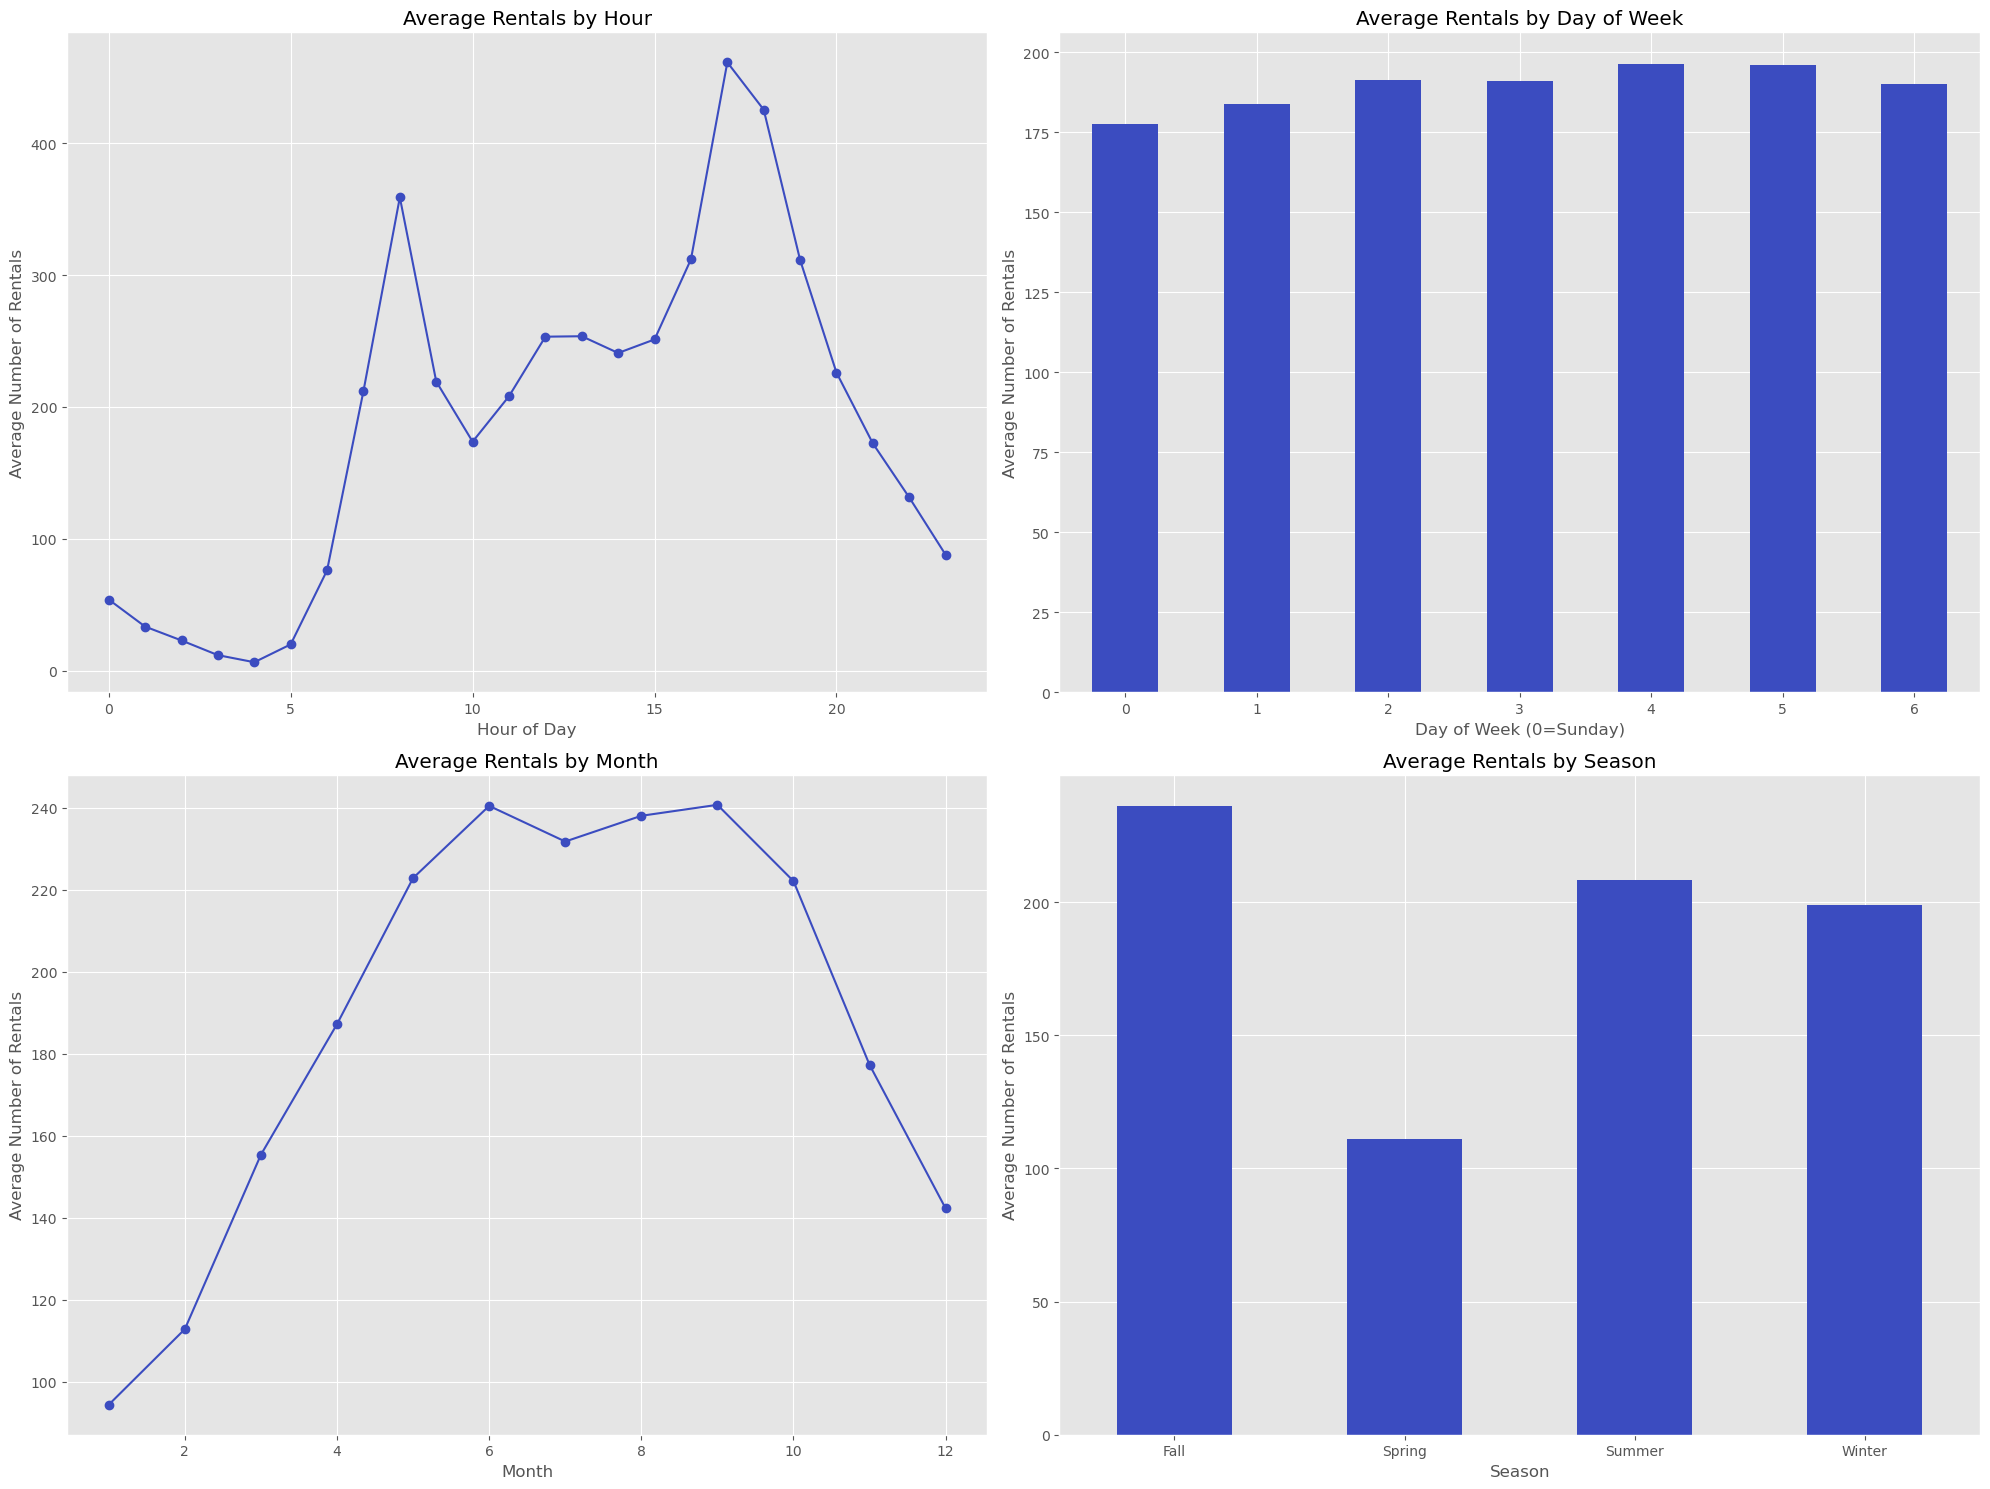

In [33]:
# Temporal Analysis
plt.figure(figsize=(20, 15))

# 1.Hourly Pattern
plt.subplot(2, 2, 1)
hourly_pattern = hourly_df.groupby('hr')['cnt'].mean()
hourly_pattern.plot(kind='line', marker='o', cmap='coolwarm',
    title='Average Rentals by Hour',
    xlabel='Hour of Day',
    ylabel='Average Number of Rentals'
)
plt.grid(True)

# 2. Daily Pattern
plt.subplot(2, 2, 2)
daily_pattern = hourly_df.groupby('weekday')['cnt'].mean()
daily_pattern.plot(kind='bar', cmap='coolwarm',
    title='Average Rentals by Day of Week',
    xlabel='Day of Week (0=Sunday)',
    ylabel='Average Number of Rentals',
    rot=0
)
plt.grid(True)

# 3. Montly Pattern
plt.subplot(2, 2, 3)
monthly_pattern = hourly_df.groupby('mnth')['cnt'].mean()
monthly_pattern.plot(kind='line', marker='o', cmap='coolwarm',
    title='Average Rentals by Month',
    xlabel='Month',
    ylabel='Average Number of Rentals'
)
plt.grid(True)

# 4. Seasonal Pattern
plt.subplot(2, 2, 4)
seasonal_pattern = hourly_df.groupby('season_name')['cnt'].mean()
seasonal_pattern.plot(kind='bar', cmap='coolwarm',
    title='Average Rentals by Season',
    xlabel='Season',
    ylabel='Average Number of Rentals',
    rot=0
)
plt.grid(True)

plt.tight_layout()
plt.show()

In [34]:
print("Hourly Statistics:")
peak_hour = hourly_pattern.idxmax()
lowest_hour = hourly_pattern.idxmin()
print(f"Peak hour: {peak_hour} with {int(hourly_pattern[peak_hour])} average rentals")
print(f"Lowest hour: {lowest_hour} with {int(hourly_pattern[lowest_hour])} average rentals\n")

Hourly Statistics:
Peak hour: 17 with 461 average rentals
Lowest hour: 4 with 6 average rentals



In [35]:
print("Daily Statistics:")
peak_day = daily_pattern.idxmax()
lowest_day = daily_pattern.idxmin()
print(f"Busiest day: Day {peak_day} with {int(daily_pattern[peak_day])} average rentals")
print(f"Quietest day: Day {lowest_day} with {int(daily_pattern[lowest_day])} average rentals\n")

Daily Statistics:
Busiest day: Day 4 with 196 average rentals
Quietest day: Day 0 with 177 average rentals



In [36]:
print("Monthly Statistics:")
peak_month = monthly_pattern.idxmax()
lowest_month = monthly_pattern.idxmin()
print(f"Peak month: Month {peak_month} with {int(monthly_pattern[peak_month])} average rentals")
print(f"Lowest month: Month {lowest_month} with {int(monthly_pattern[lowest_month])} average rentals\n")

Monthly Statistics:
Peak month: Month 9 with 240 average rentals
Lowest month: Month 1 with 94 average rentals



In [37]:
print("Seasonal Statistics:")
peak_season = seasonal_pattern.idxmax()
lowest_season = seasonal_pattern.idxmin()
print(f"Peak season: {peak_season} with {int(seasonal_pattern[peak_season])} average rentals")
print(f"Lowest season: {lowest_season} with {int(seasonal_pattern[lowest_season])} average rentals")

Seasonal Statistics:
Peak season: Fall with 236 average rentals
Lowest season: Spring with 111 average rentals


**Insight:**

1. Pola Penggunaan Per Jam:
- Peak hour terjadi pada jam 17 (5 PM) dengan rata-rata 461 peminjaman
- Lowest hour pada jam 4 pagi dengan rata-rata hanya 6 peminjaman
- Menunjukkan pola yang sesuai dengan jam kerja/aktivitas normal masyarakat

2. Pola Penggunaan Harian:
- Hari tersibuk adalah hari ke-4 (Kamis) dengan rata-rata 196 peminjaman
- Hari tersepi adalah hari ke-0 (Minggu) dengan rata-rata 177 peminjaman
- Perbedaan antara hari sibuk dan sepi tidak terlalu signifikan (hanya 19 peminjaman)

3. Pola Penggunaan Bulanan:
- Bulan tersibuk adalah bulan 9 (September) dengan rata-rata 240 peminjaman
- Bulan tersepi adalah bulan 1 (Januari) dengan rata-rata 94 peminjaman
- Terdapat perbedaan yang cukup signifikan (146 peminjaman) antara bulan tersibuk dan tersepi

4. Pola Musiman:
- Musim Fall (Gugur) adalah musim tersibuk dengan rata-rata 236 peminjaman
- Musim Spring (Semi) adalah musim tersepi dengan rata-rata 111 peminjaman
- Perbedaan yang signifikan (125 peminjaman) menunjukkan pengaruh musim terhadap penggunaan sepeda

### Pertanyaan 2

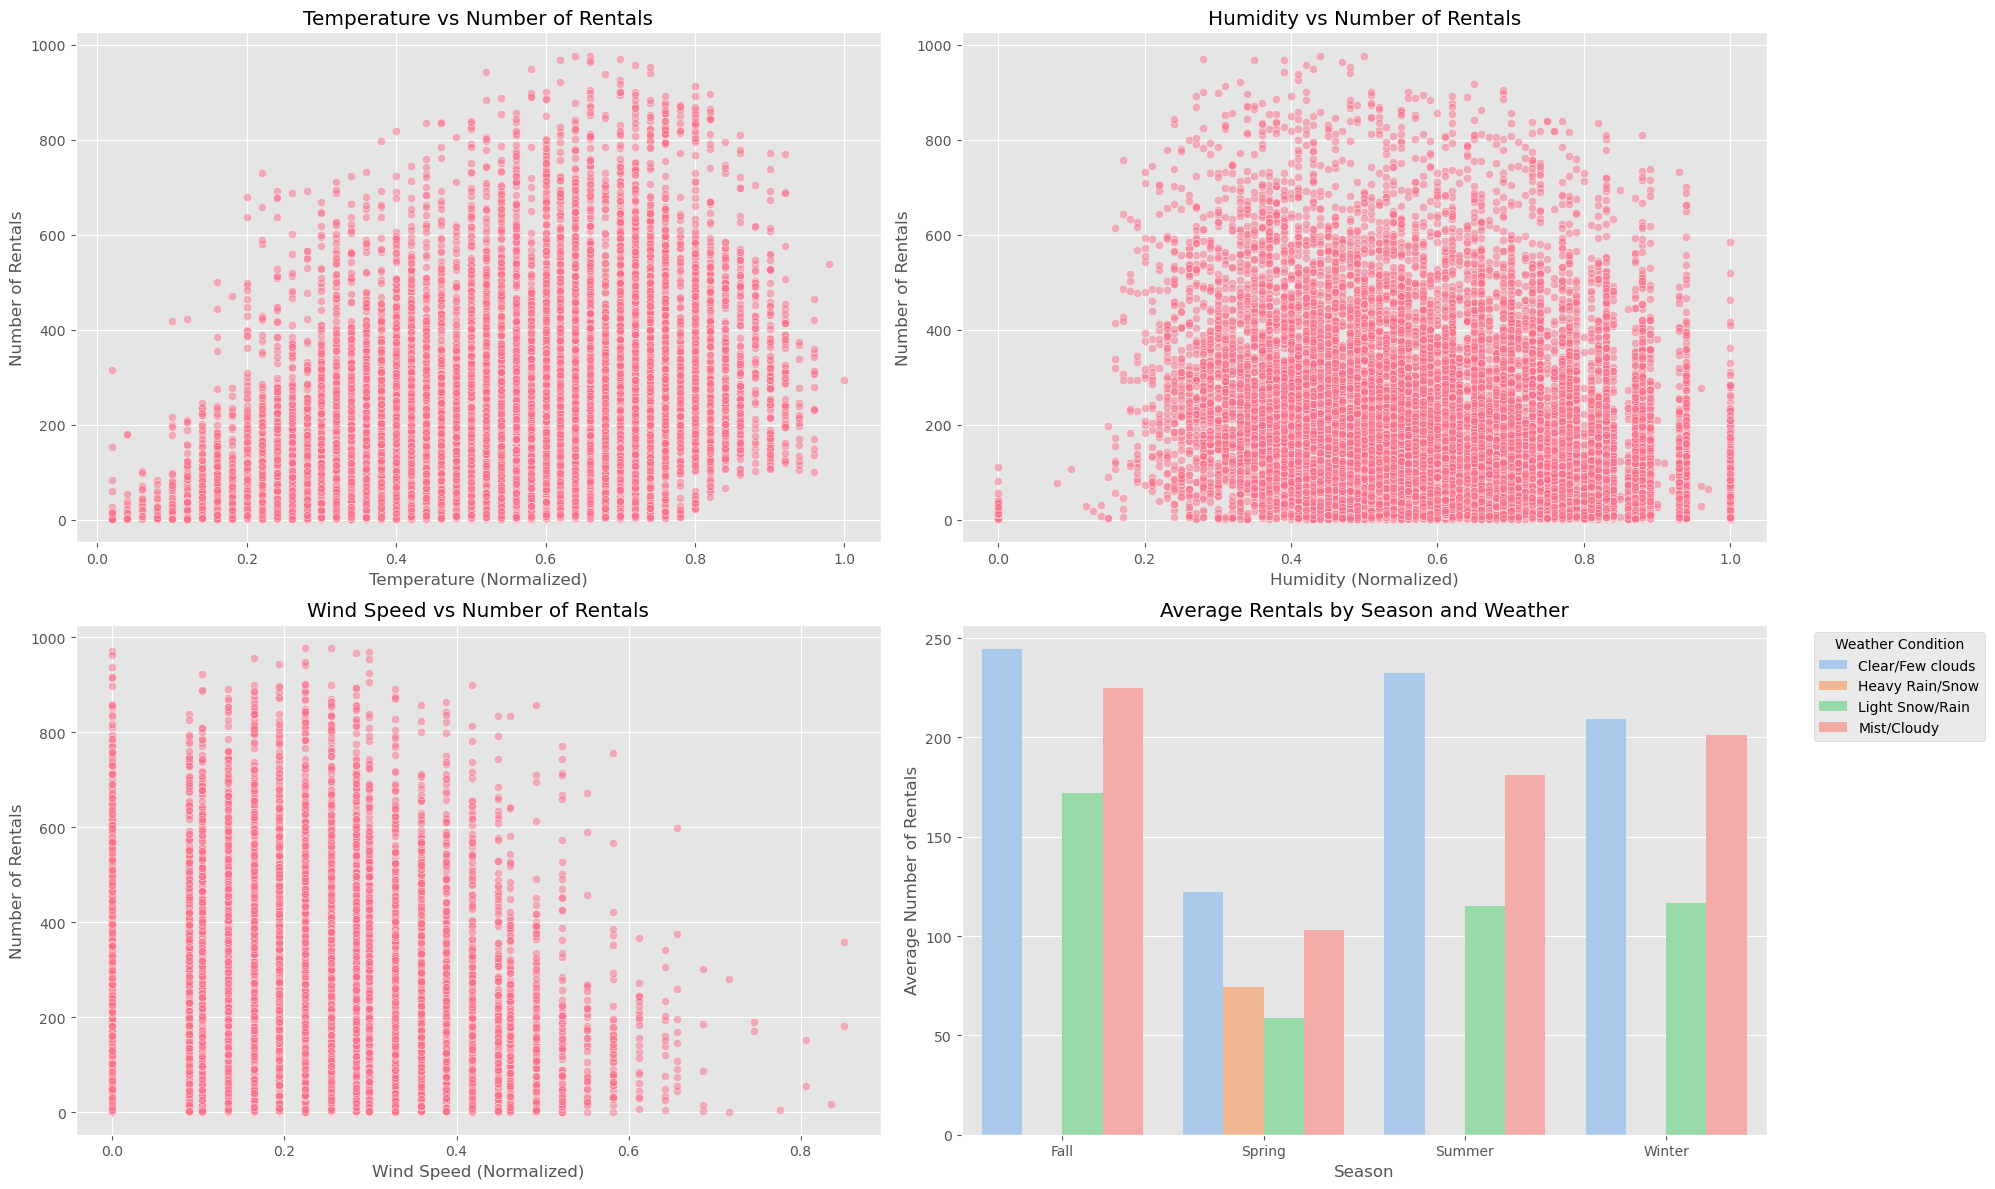

In [47]:
# Weather Impact Analysis
plt.figure(figsize=(20, 12))

# 1. Temperature vs Rentals
plt.subplot(2, 2, 1)
sns.scatterplot(data=hourly_df, x='temp', y='cnt', alpha=0.5)
plt.title('Temperature vs Number of Rentals')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Number of Rentals')

# 2. Humidity vs Rentals
plt.subplot(2, 2, 2)
sns.scatterplot(data=hourly_df, x='hum', y='cnt', alpha=0.5)
plt.title('Humidity vs Number of Rentals')
plt.xlabel('Humidity (Normalized)')
plt.ylabel('Number of Rentals')

# 3. Wind Speed vs Rentals
plt.subplot(2, 2, 3)
sns.scatterplot(data=hourly_df, x='windspeed', y='cnt', alpha=0.5)
plt.title('Wind Speed vs Number of Rentals')
plt.xlabel('Wind Speed (Normalized)')
plt.ylabel('Number of Rentals')

# 4. Average Rentals by Season and Weather
plt.subplot(2, 2, 4)
season_weather = hourly_df.groupby(['season_name', 'weather_desc'])['cnt'].mean().unstack()
season_weather_reset = season_weather.reset_index().melt(id_vars='season_name', var_name='weather_desc', value_name='cnt')
sns.barplot(x='season_name', y='cnt', hue='weather_desc', data=season_weather_reset, palette='pastel')
plt.xticks(rotation=0)
plt.title('Average Rentals by Season and Weather')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [48]:
# Print analysis summary
print("\nWeather Impact Analysis Summary:")

# Correlation analysis
weather_corr = hourly_df[['temp', 'hum', 'windspeed', 'cnt']].corr()['cnt'].sort_values(ascending=False)
print("\nCorrelation with number of rentals")
print(weather_corr)

# Average rentals by weather condition
weather_avg = hourly_df.groupby('weather_desc')['cnt'].agg(['mean', 'count']).round(2)
print("\nAverage rentals by weather condition:")
print(weather_avg)

# Average rentals by season
season_avg = hourly_df.groupby('season_name')['cnt'].agg(['mean', 'count']).round(2)
print("\nAverage rentals by season:")
print(season_avg)


Weather Impact Analysis Summary:

Correlation with number of rentals
cnt          1.000000
temp         0.404772
windspeed    0.093234
hum         -0.322911
Name: cnt, dtype: float64

Average rentals by weather condition:
                    mean  count
weather_desc                   
Clear/Few clouds  204.87  11413
Heavy Rain/Snow    74.33      3
Light Snow/Rain   111.58   1419
Mist/Cloudy       175.17   4544

Average rentals by season:
               mean  count
season_name               
Fall         236.02   4496
Spring       111.11   4242
Summer       208.34   4409
Winter       198.87   4232


**Insight:**

1. Pengaruh Suhu (Temperature):
- Memiliki korelasi positif yang cukup kuat dengan jumlah peminjaman (0.404772)
- Dari scatter plot terlihat tren positif yang jelas: semakin tinggi suhu, semakin banyak peminjaman
- Namun, pada suhu yang terlalu tinggi, jumlah peminjaman cenderung menurun

2. Pengaruh Kelembaban (Humidity):
- Memiliki korelasi negatif dengan jumlah peminjaman (-0.322911)
- Scatter plot menunjukkan bahwa kelembaban tinggi cenderung mengurangi jumlah peminjaman
- Peminjaman optimal terjadi pada kelembaban menengah

3. Pengaruh Kecepatan Angin (Wind Speed):
- Memiliki korelasi positif yang sangat lemah (0.093234)
- Scatter plot menunjukkan tidak ada pola yang jelas antara kecepatan angin dan peminjaman
- Kecepatan angin bukan faktor utama yang mempengaruhi keputusan peminjaman

4. Kondisi Cuaca dan Musim:
- Cuaca cerah/berawan ringan memiliki rata-rata peminjaman tertinggi
- Cuaca hujan/salju ringan menunjukkan penurunan signifikan dalam peminjaman
- Musim Fall (Gugur) adalah musim terbaik dengan rata-rata 236.02 peminjaman
- Musim Spring (Semi) memiliki rata-rata terendah dengan 111.11 peminjaman

5. Distribusi Data:
- Terdapat 4,544 observasi untuk kondisi Mist/Cloudy
- Musim Fall memiliki jumlah observasi terbanyak (4,496)
- Data terdistribusi cukup merata di antara musim-musim yang ada

## Pertanyaan 3

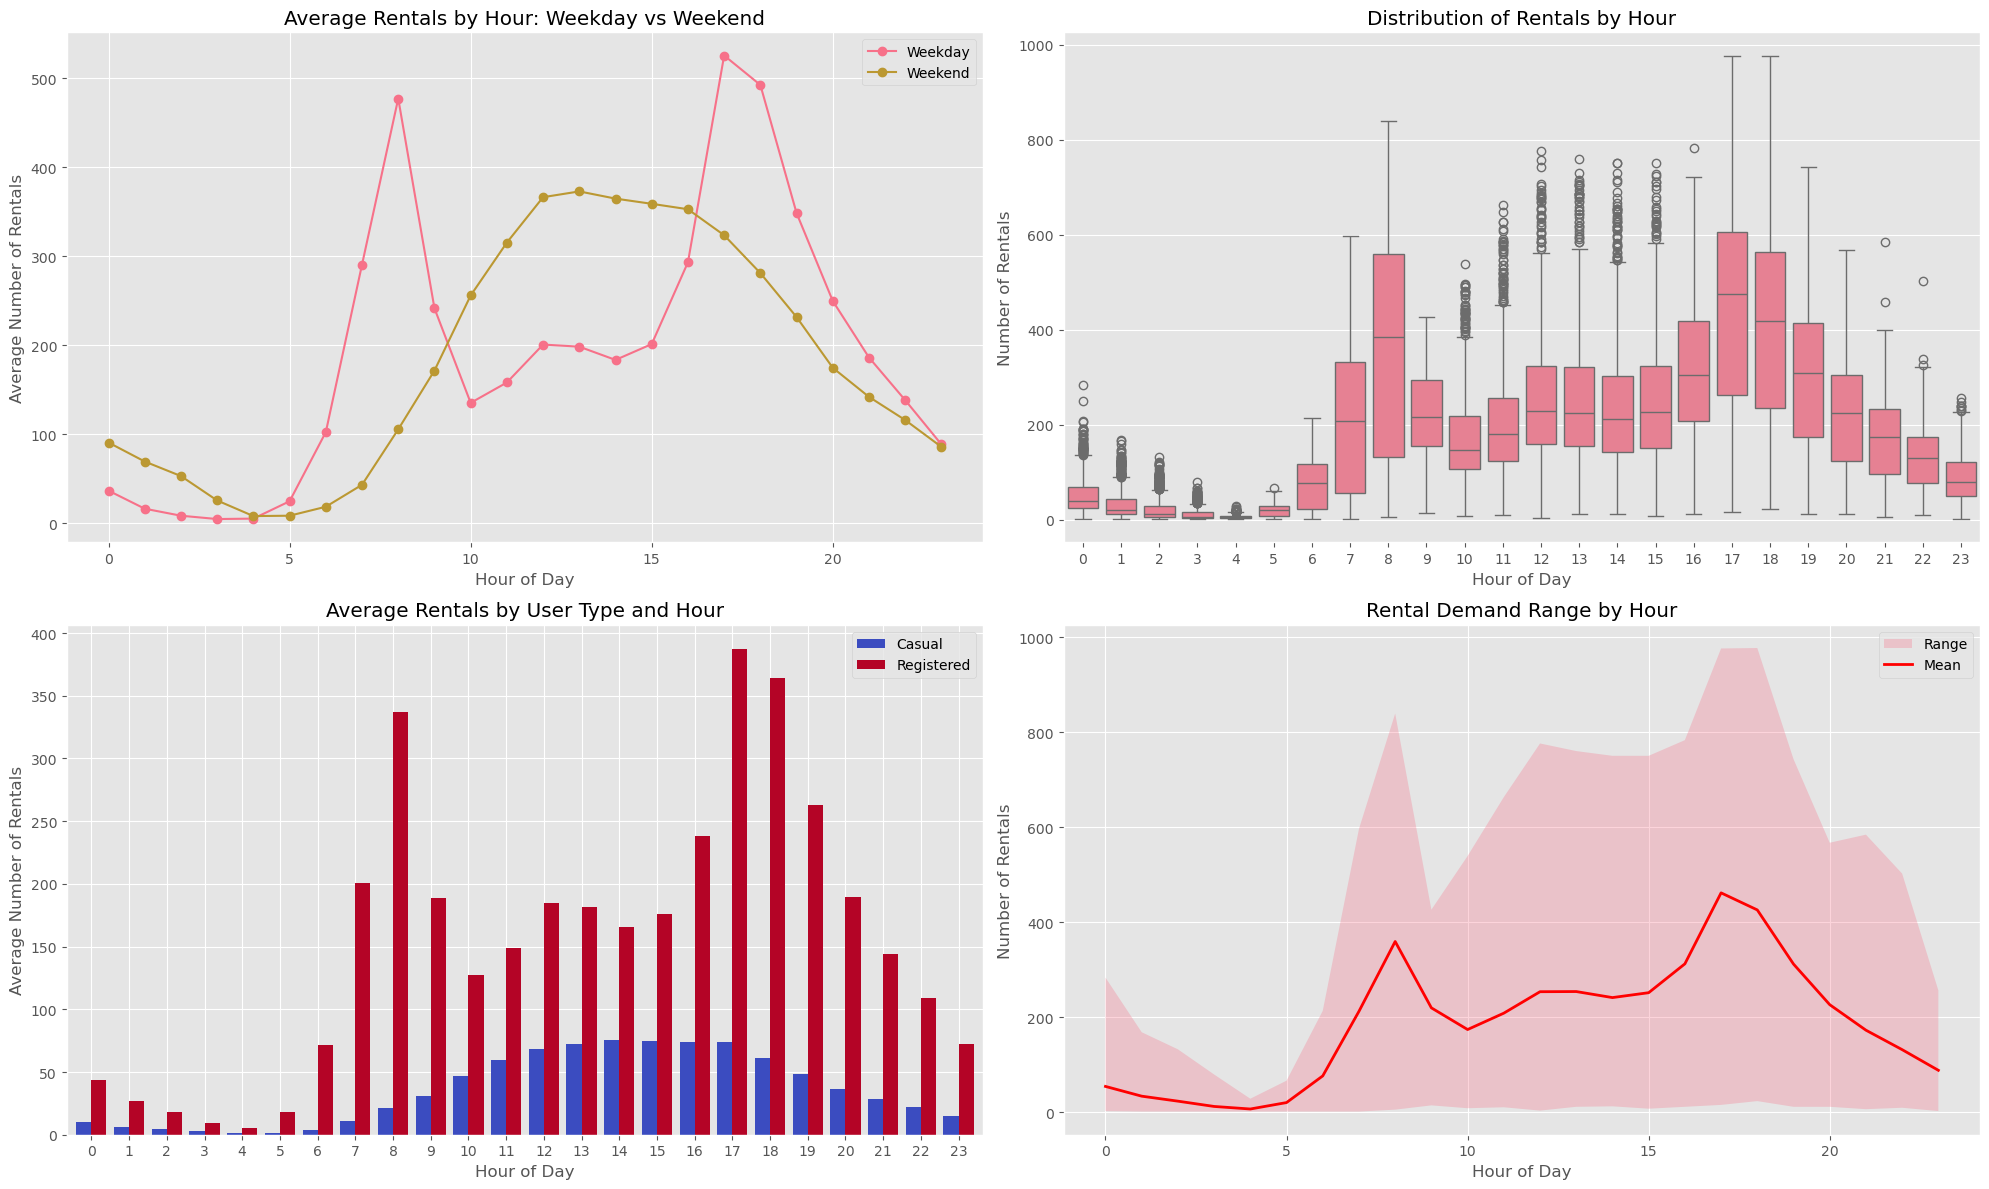

In [59]:
# Set up the figure and axes
plt.figure(figsize=(20, 12))

# 1. Average Rentals by Hour (Weekday vs Weekend)
plt.subplot(2, 2, 1)
hourly_weekday = hourly_df[hourly_df['workingday'] == 1].groupby('hr')['cnt'].mean()
hourly_weekend = hourly_df[hourly_df['workingday'] == 0].groupby('hr')['cnt'].mean()

plt.plot(hourly_weekday.index, hourly_weekday.values, marker='o', label='Weekday')
plt.plot(hourly_weekend.index, hourly_weekend.values, marker='o', label='Weekend')
plt.title('Average Rentals by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.legend()
plt.grid(True)

# 2. Distribution of Rental Counts
plt.subplot(2, 2, 2)
sns.boxplot(x='hr', y='cnt', data=hourly_df)
plt.title('Distribution of Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')

# 3. User Type Distribution by Hour
ax = plt.subplot(2, 2, 3)
hourly_user_type = hourly_df.groupby('hr')[['casual', 'registered']].mean()
hourly_user_type.plot(kind='bar', width=0.8, cmap='coolwarm', ax=ax, rot=0)
plt.title('Average Rentals by User Type and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.legend(['Casual', 'Registered'])

# 4. Capacity Utilization Analysis
plt.subplot(2, 2, 4)
hourly_percentiles = hourly_df.groupby('hr')['cnt'].agg(['mean', 'max', 'min'])
plt.fill_between(
    hourly_percentiles.index,
    hourly_percentiles['min'],
    hourly_percentiles['max'],
    alpha=0.3, label='Range'
)
plt.plot(hourly_percentiles.index, hourly_percentiles['mean'], 'r-', label='Mean', linewidth=2)
plt.title('Rental Demand Range by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [62]:
# Print statistical analysis
print("\nPeak Hours Analysis:")
peak_hours = hourly_df.groupby('hr')['cnt'].mean().sort_values(ascending=False).head()
print("\nTop 5 Busiest Hours:")
print(peak_hours)


Peak Hours Analysis:

Top 5 Busiest Hours:
hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
Name: cnt, dtype: float64


In [65]:
print("\nCapacity Planning Statistics")
capacity_stats = hourly_df.groupby('hr')['cnt'].agg(['mean', 'max', 'min', 'std']).round(2)
print("\nHourly Statistics:")
capacity_stats


Capacity Planning Statistics

Hourly Statistics:


,mean,max,min,std
hr,,,,
0,53.90,283,2,42.31
1,33.38,168,1,33.54
2,22.87,132,1,26.58
3,11.73,79,1,13.24
4,6.35,28,1,4.14
5,19.89,66,1,13.20
6,76.04,213,1,55.08
7,212.06,596,1,161.44
8,359.01,839,5,235.19


In [64]:
# Calculate utilization rates
total_bikes = hourly_df['cnt'].max()
utilization_rate = (hourly_df.groupby('hr')['cnt'].mean() / total_bikes * 100).round(2)
print("\nBike Utilization Rate by Hour (%):")
print(utilization_rate)


Bike Utilization Rate by Hour (%):
hr
0      5.52
1      3.42
2      2.34
3      1.20
4      0.65
5      2.04
6      7.78
7     21.71
8     36.75
9     22.45
10    17.78
11    21.30
12    25.93
13    25.96
14    24.66
15    25.71
16    31.93
17    47.23
18    43.55
19    31.89
20    23.14
21    17.64
22    13.44
23     8.99
Name: cnt, dtype: float64


**Insight:**

1. Analisis Peak Hours:
- Jam tersibuk adalah pukul 17:00 (461.45 peminjaman rata-rata)
- Top 5 jam tersibuk:
* 17:00 - 461.45 peminjaman
* 18:00 - 425.51 peminjaman
* 08:00 - 359.01 peminjaman
* 16:00 - 311.98 peminjaman
* 19:00 - 311.52 peminjaman
- Menunjukkan dua peak hours: pagi (commuting ke kantor) dan sore (pulang kerja)

2. Perbedaan Weekday vs Weekend:
- Pola penggunaan weekday menunjukkan dua puncak yang jelas (pagi dan sore)
- Weekend memiliki pola yang lebih merata sepanjang hari
- Weekday memiliki volume peminjaman yang lebih tinggi pada jam-jam sibuk

3. Distribusi Pengguna:
- Pengguna registered mendominasi pada jam-jam sibuk
- Pengguna casual lebih banyak pada akhir pekan
- Pola yang berbeda ini membantu dalam perencanaan layanan

4. Tingkat Utilisasi:
- Utilisasi tertinggi pada jam 17:00 (47.23% dari kapasitas maksimal)
- Utilisasi terendah pada jam 4:00 (0.65% dari kapasitas)
- Jam 16:00-19:00 memiliki utilisasi di atas 30%

Rekomendasi untuk Optimasi Bisnis:
1. Manajemen Kapasitas:
- Pastikan ketersediaan maksimal sepeda pada jam 7:00-9:00 dan 16:00-19:00
- Bisa mengurangi jumlah sepeda pada jam 23:00-5:00
- Pertahankan minimal 50% kapasitas untuk mengantisipasi lonjakan permintaan

2. Strategi Operasional:
- Lakukan pemeliharaan dan redistribusi sepeda pada jam-jam sepi (1:00-5:00)
- Siapkan staff tambahan pada jam-jam sibuk
- Pertimbangkan insentif khusus untuk penggunaan di luar jam sibuk

3. Optimasi Armada:
- Minimal sepeda yang harus tersedia: 977 unit (peak demand)
- Bisa menggunakan sistem dinamis dimana jumlah sepeda disesuaikan dengan pola harian

## Pertanyaan 4

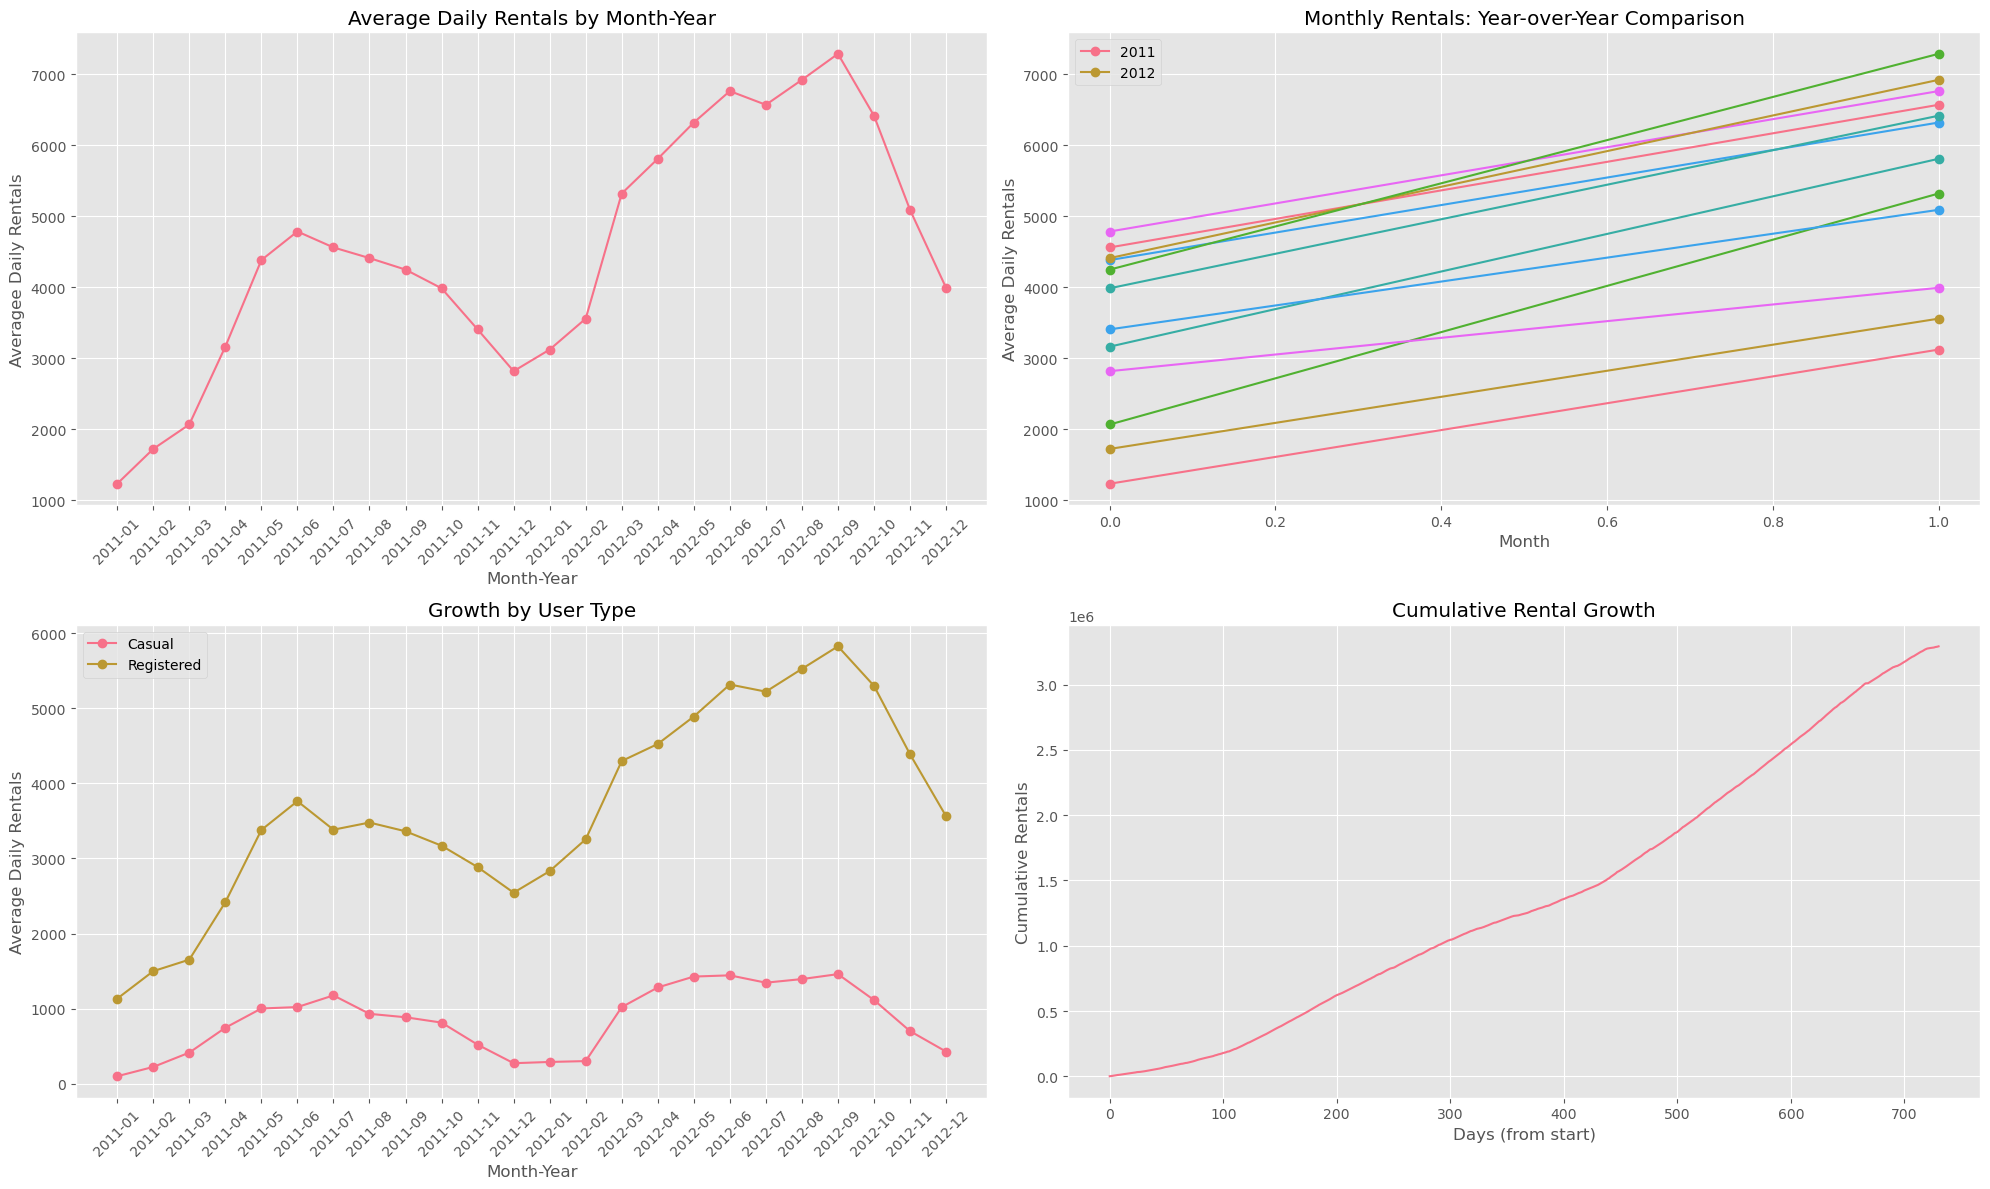

In [66]:
# Set up the figureee
plt.figure(figsize=(20, 12))

# 1. Monthly Growth Analysis
plt.subplot(2, 2, 1)
monthly_growth = daily_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()
monthly_growth['date'] = monthly_growth.apply(lambda x: f"{int(x['yr'])+2011}-{int(x['mnth']):02d}", axis=1)
plt.plot(range(len(monthly_growth)), monthly_growth['cnt'], marker='o')
plt.xticks(range(len(monthly_growth)), monthly_growth['date'], rotation=45)
plt.title('Average Daily Rentals by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Averagee Daily Rentals')
plt.grid(True)

# 2. Year-over-Year Comparison
ax = plt.subplot(2, 2, 2)
yearly_comparison = daily_df.groupby(['yr', 'mnth'])['cnt'].mean().unstack()
yearly_comparison.plot(marker='o', ax=ax)
plt.title('Monthly Rentals: Year-over-Year Comparison')
plt.xlabel('Month')
plt.ylabel('Average Daily Rentals')
plt.legend(['2011', '2012'])
plt.grid(True)

# 3. User Type Growth
plt.subplot(2, 2, 3)
user_type_growth = daily_df.groupby(['yr', 'mnth'])[['casual', 'registered']].mean().reset_index()
user_type_growth['date'] = user_type_growth.apply(lambda x: f"{int(x['yr'])+2011}-{int(x['mnth']):02d}", axis=1)

plt.plot(range(len(user_type_growth)), user_type_growth['casual'], marker='o', label='Casual')
plt.plot(range(len(user_type_growth)), user_type_growth['registered'], marker='o', label='Registered')
plt.xticks(range(len(user_type_growth)), user_type_growth['date'], rotation=45)
plt.title('Growth by User Type')
plt.xlabel('Month-Year')
plt.ylabel('Average Daily Rentals')
plt.legend()
plt.grid(True)

# 4. Cumulative Growth
plt.subplot(2, 2, 4)
daily_df['cumulative_rentals'] = daily_df['cnt'].cumsum()
plt.plot(range(len(daily_df)), daily_df['cumulative_rentals'])
plt.title('Cumulative Rental Growth')
plt.xlabel('Days (from start)')
plt.ylabel('Cumulative Rentals')
plt.grid(True)

plt.tight_layout()
plt.show()

In [67]:
# Print statistical analysis
print("\nGrowth Analysis:")

# Year-over-year growth
yearly_avg = daily_df.groupby('yr')['cnt'].mean()
yoy_growth = ((yearly_avg[1] - yearly_avg[0]) / yearly_avg[0] * 100).round(2)
print(f"\nYear-over-Year Growth: {yoy_growth}%")


Growth Analysis:

Year-over-Year Growth: 64.43%


In [69]:
# Monthly averages
monthly_avg = daily_df.groupby(['yr', 'mnth'])['cnt'].mean().round(2)
print('\nMonthly Averages:')
monthly_avg


Monthly Averages:


yr  mnth
0   1       1231.90
    2       1721.96
    3       2065.97
    4       3162.33
    5       4381.32
    6       4783.73
    7       4559.39
    8       4409.39
    9       4247.27
    10      3984.23
    11      3405.57
    12      2816.87
1   1       3120.77
    2       3556.45
    3       5318.55
    4       5807.47
    5       6318.23
    6       6761.00
    7       6567.97
    8       6919.45
    9       7285.77
    10      6414.23
    11      5088.80
    12      3990.74
Name: cnt, dtype: float64

In [70]:
# User type growth
user_type_yearly = daily_df.groupby('yr')[['casual', 'registered']].mean()
casual_growth = ((user_type_yearly.loc[1, 'casual'] - user_type_yearly.loc[0, 'casual']) / user_type_yearly.loc[0, 'casual'] * 100).round(2)
registered_growth = ((user_type_yearly.loc[1, 'registered'] - user_type_yearly.loc[0, 'registered']) / user_type_yearly.loc[0, 'registered'] * 100).round(2)

print("\nUser Type Growth:")
print(f"Casual Users Growth: {casual_growth}%")
print(f"Registered Users Growth: {registered_growth}%")


User Type Growth:
Casual Users Growth: 50.35%
Registered Users Growth: 67.92%


In [71]:
# Peak rental days
peak_days = daily_df.nlargest(5, 'cnt')[['dteday', 'cnt']]
print("\nTop 5 Peak Rental Days:")
print(peak_days)


Top 5 Peak Rental Days:
        dteday   cnt
623 2012-09-15  8714
637 2012-09-29  8555
630 2012-09-22  8395
447 2012-03-23  8362
504 2012-05-19  8294


**Insight:**

1. Pertumbuhan Tahunan yang Signifikan:
    - Pertumbuhan year-over-year sangat mengesankan sebesar 64.43%
    - Menunjukkan peningkatan popularitas dan adopsi layanan yang kuat

2. Pertumbuhan Berdasarkan Tipe Pengguna:
    - Pengguna registered menunjukkan pertumbuhan lebih tinggi (67.92%)
    - Pengguna casual juga tumbuh signifikan (50.35%)
    - Menandakan keberhasilan program membership dan loyalitas pelanggan

3. Pola Musiman dan Peak Days:
    - Top 5 hari dengan peminjaman tertinggi:
        * 15 September 2012: 8,714 peminjaman
        * 29 September 2012: 8,555 peminjaman
        * 22 September 2012: 8,395 peminjaman
        * 23 Maret 2012: 8,362 peminjaman
        * 19 Mei 2012: 8,294 peminjaman
    - September menjadi bulan dengan aktivitas tertinggi

4. Tren dan Pola:
    - Terjadi peningkatan konsisten dari 2011 ke 2012
    - Pola musiman terlihat jelas dengan peak pada bulan-bulan musim panas/gugur
    - Pertumbuhan kumulatif menunjukkan tren positif yang stabil

## Pertanyaan 5

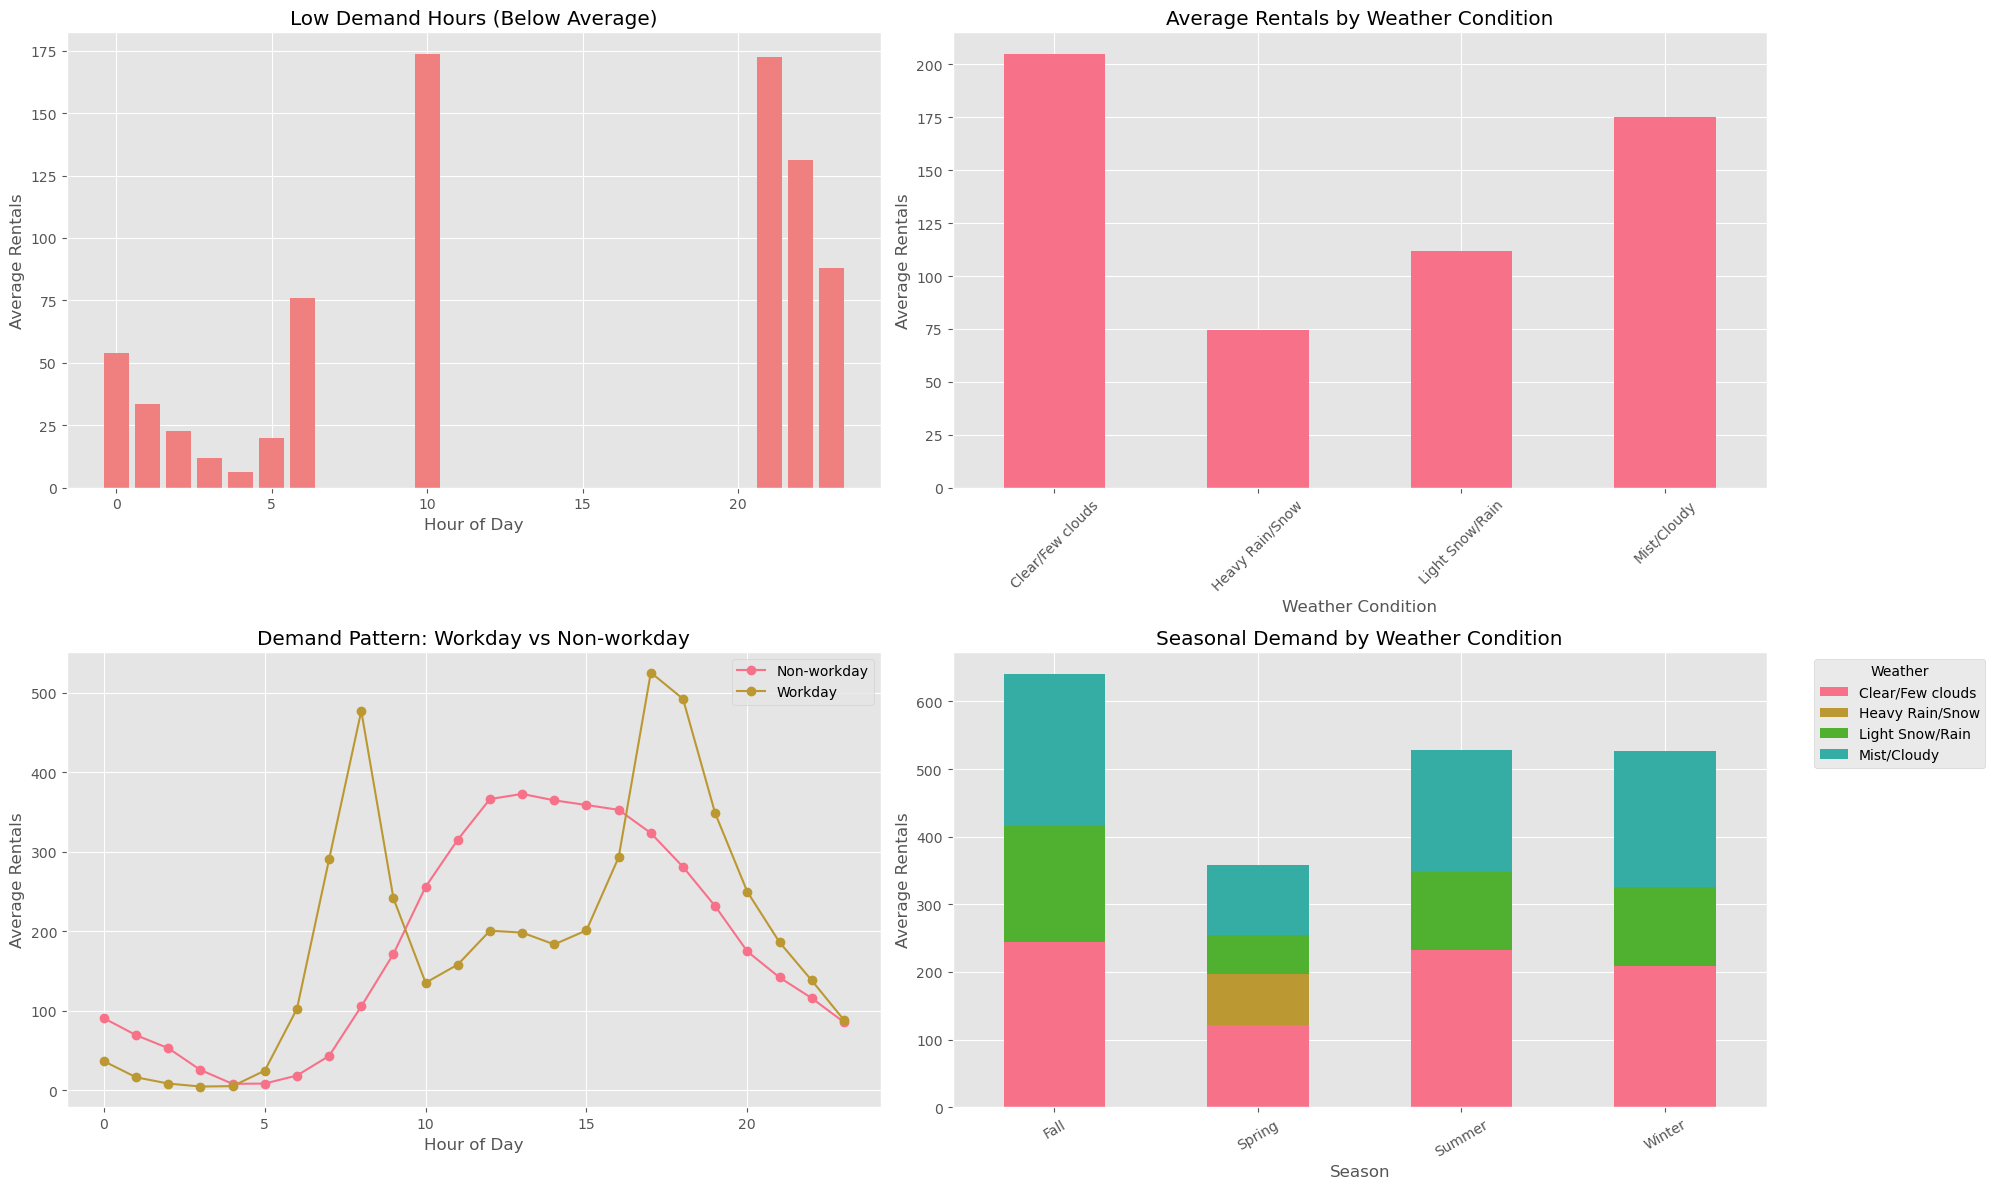

In [74]:
# Set up the figure
plt.figure(figsize=(20, 12))

# 1. Off-Peak Analysis
plt.subplot(2, 2, 1)
off_peak_hours = hourly_df.groupby('hr')['cnt'].mean()
low_demand_hours = off_peak_hours[off_peak_hours < off_peak_hours.mean()]
plt.bar(low_demand_hours.index, low_demand_hours.values, color='lightcoral')
plt.title('Low Demand Hours (Below Average)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.grid(True)


# 2. Weather Impact on Low Demand
ax = plt.subplot(2, 2, 2)
weather_impact = hourly_df.groupby('weather_desc')['cnt'].agg(['mean', 'count']).round(2)
weather_impact['percentage'] = (weather_impact['count'] / len(hourly_df) * 100).round(2)
weather_impact['mean'].plot(kind='bar', ax=ax)
plt.title('Average Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.grid(True)

# 3. Location/Station Analysis (using hour as proxy for location demand)
ax1= plt.subplot(2, 2, 3)
location_demand = hourly_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()
location_demand.plot(marker='o', ax=ax1)
plt.title('Demand Pattern: Workday vs Non-workday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend(['Non-workday', 'Workday'])
plt.grid(True)

# 4. Seasonal Strategy Analysis
ax2 = plt.subplot(2, 2, 4)
seasonal_strategy = hourly_df.groupby(['season_name', 'weather_desc'])['cnt'].mean().unstack()
seasonal_strategy.plot(kind='bar', stacked=True, ax=ax2, rot=30)
plt.title('Seasonal Demand by Weather Condition')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

In [75]:
# Print analysis results
print("\nStrategic Analysis Results:")

# 1. Low Demand Periods
print("\nLow Demand Hours (Below Average):")
print(low_demand_hours)


Strategic Analysis Results:

Low Demand Hours (Below Average):
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
10    173.668501
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [76]:
# 2. Weather Impact Analysis
print("\nWeather Impact on Rentals:")
print(weather_impact)


Weather Impact on Rentals:
                    mean  count  percentage
weather_desc                               
Clear/Few clouds  204.87  11413       65.67
Heavy Rain/Snow    74.33      3        0.02
Light Snow/Rain   111.58   1419        8.17
Mist/Cloudy       175.17   4544       26.15


In [77]:
# 3. Peak vs Off-Peak Analysis
peak_hours = hourly_df.groupby('hr')['cnt'].mean()
print("\nPeak Hours (Top 5):")
print(peak_hours.nlargest(5))
print("\nOff-Peak Hours (Bottom 5):")
print(peak_hours.nsmallest(5))


Peak Hours (Top 5):
hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
Name: cnt, dtype: float64

Off-Peak Hours (Bottom 5):
hr
4     6.352941
3    11.727403
5    19.889819
2    22.869930
1    33.375691
Name: cnt, dtype: float64


In [78]:
# 4. Seasonal Strategy Recommendations
seasonal_avg = hourly_df.groupby('season_name')['cnt'].mean().sort_values(ascending=False)
print("\nSeasonal Average Rentals:")
print(seasonal_avg)


Seasonal Average Rentals:
season_name
Fall      236.016237
Summer    208.344069
Winter    198.868856
Spring    111.114569
Name: cnt, dtype: float64


In [81]:
# Calculate potential improvement areas
print("\nPotential Improvement Areas:")
avg_rentals = hourly_df['cnt'].mean()
improvement_potential = hourly_df.groupby('hr').agg({
    'cnt': ['mean', 'max']
}).round(2)
improvement_potential['potential_increase'] = (improvement_potential['cnt']['max'] - improvement_potential['cnt']['mean']).round(2)
print(improvement_potential.nlargest(5, 'potential_increase'))


Potential Improvement Areas:
       cnt      potential_increase
      mean  max                   
hr                                
18  425.51  977             551.49
12  253.32  776             522.68
17  461.45  976             514.55
14  240.95  750             509.05
13  253.66  760             506.34


**Insight:**

1. Identifikasi Periode Permintaan Rendah:
- Jam-jam dengan permintaan rendah (di bawah rata-rata):
* Terendah: Jam 4 pagi (6.35 peminjaman)
* Jam 1-5 pagi konsisten rendah
* Jam 21-23 (9-11 malam) juga menunjukkan permintaan rendah
- Ini memberikan peluang untuk strategi peningkatan di jam-jam tersebut

2. Analisis Dampak Cuaca:
- Clear/Few clouds: rata-rata 204.87 peminjaman (65.67% dari total waktu)
- Mist/Cloudy: rata-rata 175.17 peminjaman (26.15% dari total waktu)
- Light Snow/Rain: rata-rata 111.58 peminjaman (8.17% dari total waktu)
- Heavy Rain/Snow: rata-rata 74.33 peminjaman (0.02% dari total waktu)

3. Pola Permintaan Peak vs Off-Peak:
- Peak Hours (Top 5):
* Jam 17: 461.45 peminjaman
* Jam 18: 425.51 peminjaman
* Jam 8: 359.01 peminjaman
* Jam 16: 311.98 peminjaman
* Jam 19: 311.52 peminjaman

4. Analisis Musiman:
- Fall (Musim Gugur): 236.02 peminjaman rata-rata
- Summer (Musim Panas): 208.34 peminjaman rata-rata
- Winter (Musim Dingin): 198.87 peminjaman rata-rata
- Spring (Musim Semi): 111.11 peminjaman rata-rata

5. Area Potensial untuk Peningkatan:
- Jam 18: potensial peningkatan 551.49 peminjaman
- Jam 12: potensial peningkatan 522.68 peminjaman
- Jam 17: potensial peningkatan 514.55 peminjaman
- Jam 14: potensial peningkatan 509.05 peminjaman
- Jam 13: potensial peningkatan 506.34 peminjaman

Rekomendasi Strategis:

1. Untuk Meningkatkan Pengguna pada Waktu Sepi:
- Terapkan harga dinamis dengan diskon khusus untuk jam-jam sepi (1-5 pagi)
- Buat program khusus untuk shift malam (21-23)
- Kembangkan promosi khusus untuk penggunaan di jam non-peak

2. Optimasi Distribusi Sepeda:
- Fokuskan ketersediaan sepeda maksimal pada jam 17-19
- Kurangi jumlah sepeda yang tersedia pada jam 1-5 pagi
- Sesuaikan distribusi sepeda berdasarkan musim

3. Strategi Cuaca:
- Siapkan perlengkapan tambahan untuk cuaca buruk
- Berikan insentif khusus saat cuaca kurang baik
- Kembangkan sistem prediksi permintaan berbasis cuaca

4. Pengembangan Area:
- Prioritaskan pengembangan di area dengan potensi peningkatan tinggi
- Sesuaikan jumlah sepeda berdasarkan pola penggunaan harian
- Optimalkan redistribusi sepeda antar stasiun pada jam-jam strategis

## Conclusion

1. Analisis Pola Penggunaan:
- Terdapat dua peak hours utama: pagi (sekitar jam 8) dan sore (jam 17-18)
- Hari kerja memiliki pola yang berbeda dengan akhir pekan
- Musim Fall (Gugur) adalah musim tersibuk dengan rata-rata 236 peminjaman
- Pengguna registered mendominasi pada jam kerja, sementara casual lebih tinggi di akhir pekan

2. Analisis Faktor Cuaca:
- Suhu memiliki korelasi positif (0.40) dengan jumlah peminjaman
- Kelembaban berkorelasi negatif (-0.32) dengan peminjaman
- Cuaca cerah menghasilkan peminjaman tertinggi (rata-rata 204.87)
- Musim Fall paling banyak peminjaman, Spring paling sedikit

3. Optimasi Bisnis:
- Peak hours: Jam 17 (461 peminjaman) dan Jam 18 (425 peminjaman)
- Utilisasi tertinggi mencapai 47.23% pada jam sibuk
- Perlu minimal 977 sepeda untuk memenuhi peak demand
- Jam 1-5 pagi bisa beroperasi dengan kapasitas minimal

4. Analisis Pertumbuhan:
- Pertumbuhan year-over-year mencapai 64.43%
- Pengguna registered tumbuh 67.92%, casual tumbuh 50.35%
- September 2012 mencatat rekor tertinggi dengan 8,714 peminjaman
- Menunjukkan tren pertumbuhan yang konsisten dan positif

5. Rekomendasi Strategis:
- Terapkan harga dinamis untuk meningkatkan penggunaan di jam sepi
- Optimalkan distribusi sepeda berdasarkan pola penggunaan
- Kembangkan strategi khusus untuk cuaca buruk
- Fokuskan pengembangan pada area dengan potensi peningkatan tinggi

Kesimpulan Umum:
- Layanan bike sharing menunjukkan pertumbuhan yang kuat dan pola penggunaan yang dapat diprediksi
- Faktor cuaca dan waktu sangat mempengaruhi tingkat penggunaan
- Ada potensi besar untuk optimasi layanan melalui strategi pricing dan distribusi
- Fokus pada pengguna registered memberikan hasil positif untuk pertumbuhan bisnis
- Diperlukan strategi yang berbeda untuk weekday vs weekend dan berbagai kondisi cuaca
